#  Exploratory Data Analysis

##  Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
sns.set(font_scale = 1.5)
sns.set_style('ticks')
sns.set()

In [2]:
#  Load cleaned data
df = pd.read_csv('../raw_data/clean_data.csv')
%time

CPU times: user 5 µs, sys: 6 µs, total: 11 µs
Wall time: 30 µs


In [3]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,FATAL,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992.0,1.0,F,33.0,Driver,Injury,Safety device used,Motor Vehicle Driver,2890
1,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992.0,1.0,F,70.0,Driver,No Injury,Safety device used,Motor Vehicle Driver,2890
2,1999,January,Monday,20.0,0,1.0,Ran off left shoulder,Intersection with parking lot entrance,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1988.0,1.0,F,38.0,Driver,Injury,Safety device used,Motor Vehicle Driver,4332
3,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,Other trucks and vans,1995.0,1.0,M,34.0,Driver,No Injury,Safety device used,Motor Vehicle Driver,5053
4,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,Other trucks and vans,1995.0,2.0,M,30.0,"Front row, right outboard",No Injury,Safety device used,Motor Vehicle Passenger,5053


In [4]:
# data shape
df.shape

(3817613, 23)

##  What is the fatality rate by gender?

In [8]:
pd.crosstab(df['FATAL'], df['P_SEX'], margins = True, margins_name = 'Total')

P_SEX,F,M,Total
FATAL,,,
0,1744035,2012269,3756304
1,20795,40514,61309
Total,1764830,2052783,3817613


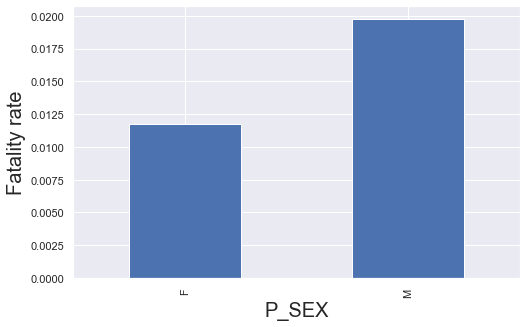

In [9]:
df.groupby('P_SEX')['FATAL'].mean().plot(kind = 'bar', figsize=(8,5), color = 'b')
plt.xlabel('P_SEX', fontsize=20)
plt.ylabel('Fatality rate', fontsize=20) 
plt.savefig('../Figures/fig2.pdf')

- We can see that almost 1 in 100 females are involved in fatal accidents, whereas 2 in 100 males are involved in fatal accidents

- As we already know from the previous plots that the fatality rate is high for males than females.

- The age vs. sex plot suggests more investigation (see below).

##  What age group are involved in fatal collision?

In [10]:
df.pivot_table('P_AGE', index = 'P_SEX', columns = 'FATAL', aggfunc = 'mean')

FATAL,0,1
P_SEX,,
F,36.490061,39.067853
M,36.727187,38.287308


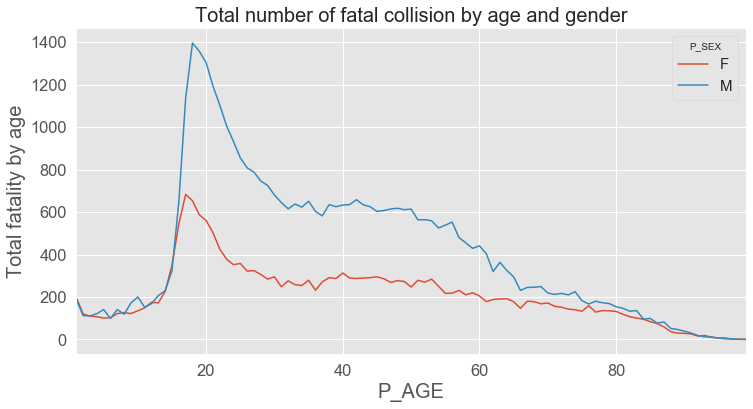

In [11]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
pivot_tab_age =df.pivot_table('FATAL', index = 'P_AGE', columns = 'P_SEX', aggfunc = 'sum')
pivot_tab_age.plot(figsize = (12,6))

plt.xlabel('P_AGE', fontsize = 20)
plt.ylabel('Total fatality by age', fontsize = 20)
plt.legend(title = 'P_SEX', prop={'size': 15})
plt.title('Total number of fatal collision by age and gender', fontsize = 20)
plt.savefig('../Figures/fig3.pdf')

- The plot shows that teenagers at 18 years old (mostly males) involve in most fatal collisions
- The total number of fatal accidents fluctuates slightly between age 22 to 80
- Majority of people (males and females) involved in any sort of collision are  within 19 and 20 years old.

In [12]:
age = pd.cut(df['P_AGE'],[0,18,50,100])
df.pivot_table('FATAL', index = ['P_SEX',age], aggfunc = 'sum')

FATAL
P_SEX P_AGE           
F     (0, 18]     4193
      (18, 50]   10206
      (50, 100]   6396
M     (0, 18]     5663
      (18, 50]   23964
      (50, 100]  10887

## What is the age distribution among fatal collision?

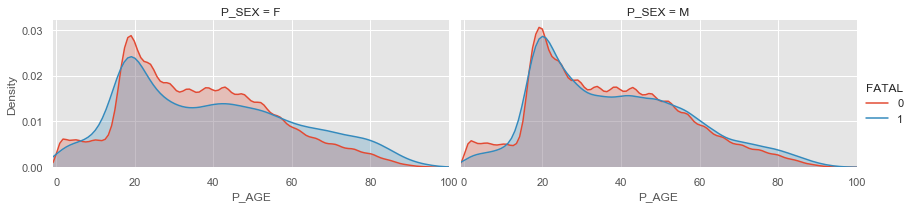

In [13]:
sns.set(font_scale = 1)
plt.style.use('ggplot')

g = sns.FacetGrid(data = df.dropna(), hue = 'FATAL',col = 'P_SEX',aspect=2)
(g.map(sns.kdeplot, 'P_AGE', shade = True).set_axis_labels("P_AGE","Density").add_legend())
plt.xlim([-1,100])

plt.savefig('../Figures/fig4.pdf')

##  Which vehicle model year was involved in most fatal collisions?

(1970, 2020)

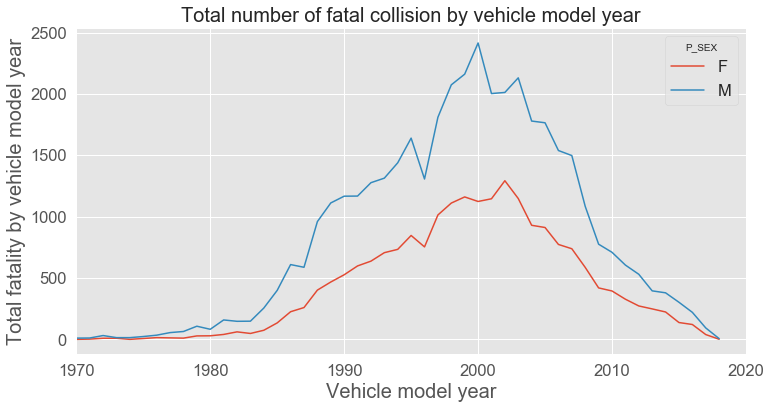

In [14]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
pivot_tab_v_year =df.pivot_table('FATAL', index = 'V_YEAR', columns = 'P_SEX', aggfunc = 'sum')
pivot_tab_v_year.plot(figsize = (12,6))

plt.xlabel('Vehicle model year', fontsize = 20)
plt.ylabel('Total fatality by vehicle model year', fontsize = 20)
plt.legend(title = 'P_SEX')
plt.title('Total number of fatal collision by vehicle model year', fontsize = 20)
plt.savefig('../Figures/fig5.pdf')
plt.xlim([1970,2020])

- The vehicle models in the year 2000 & 2001  caused the most fatal collisions and they were driven mostly by males

## What is the collision distribution of vehicle model year by gender

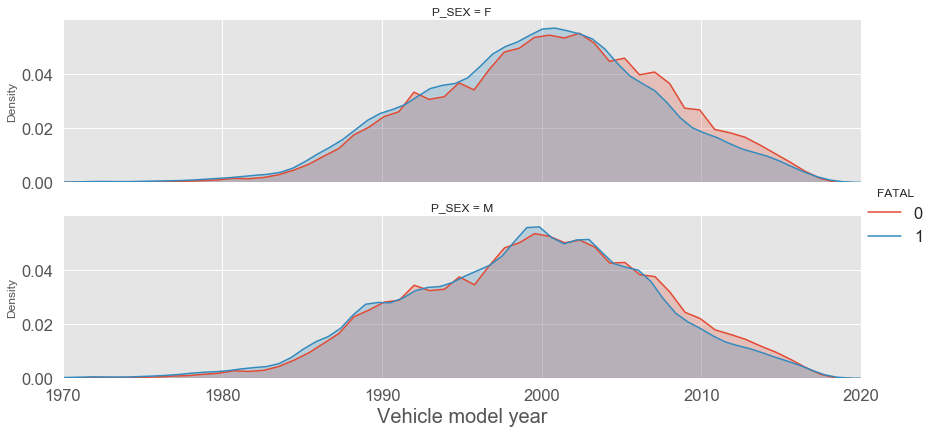

In [15]:
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

g = sns.FacetGrid(data = df.dropna(), hue = 'FATAL',row = 'P_SEX', aspect =4)  
(g.map(sns.kdeplot, 'V_YEAR', shade = True).set_axis_labels("Vehicle model year","Density").add_legend())
plt.xlim([1970,2020])
plt.xlabel("Vehicle model year", fontsize = 20)
#plt.legend(title = 'Fatality', fontsize = 20)
plt.savefig('../figures/fig7.pdf')

- The new vehicle models from 2005 to present seem to be involved in mostly non-fatal collisions.

##  What is the fatality rate of males and  females each year?

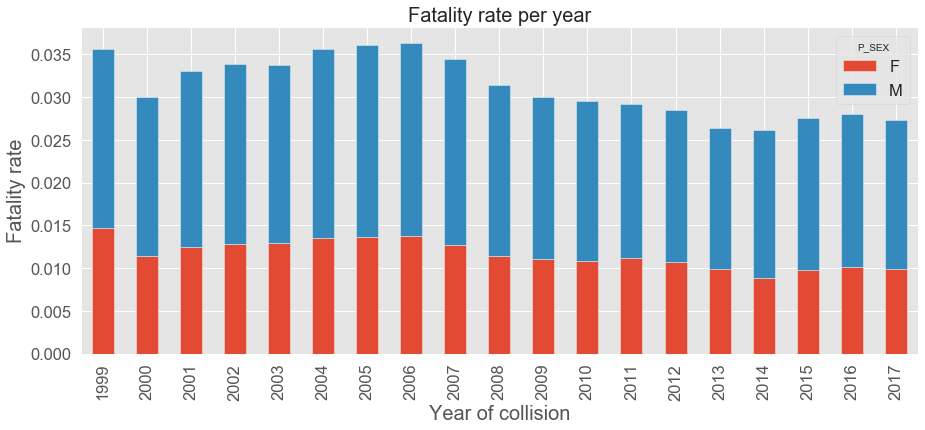

In [16]:
# Plot size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
table_year = df.pivot_table('FATAL', index = 'C_YEAR', columns = 'P_SEX', aggfunc = 'mean')
table_year.plot(kind = 'bar', stacked = True,figsize = (15,6))

plt.xlabel('Year of collision', fontsize = 20)
plt.ylabel('Fatality rate', fontsize = 20)
plt.title('Fatality rate per year', fontsize = 20)
plt.savefig('../figures/fig1.pdf')

We can see that
 
- most vehicle collisions occur  in the year 1999, 2006, and 2007.

- more males got involved in a vehicle collision than females

## What type of vechicle caused the most fatal collisions

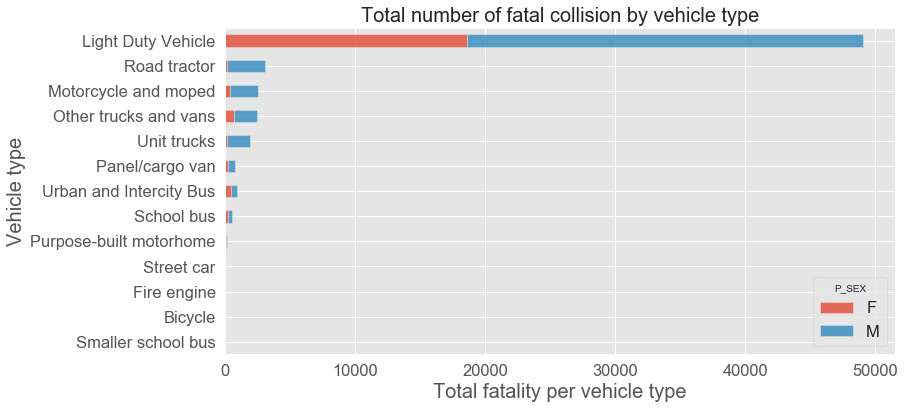

In [17]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
table_vtype = df.pivot_table('FATAL', index = 'V_TYPE', columns = 'P_SEX', aggfunc = 'sum')
table_vtype.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Vehicle type', fontsize=20)
plt.xlabel('Total fatality per vehicle type', fontsize=20)
plt.legend(loc= 'lower right', title = 'P_SEX')
plt.title('Total number of fatal collision by vehicle type', fontsize=20)
plt.savefig('../figures/fig6.pdf')

- Most fatal accident are caused by light duty vehicles

##  What is the fatality rate per day?

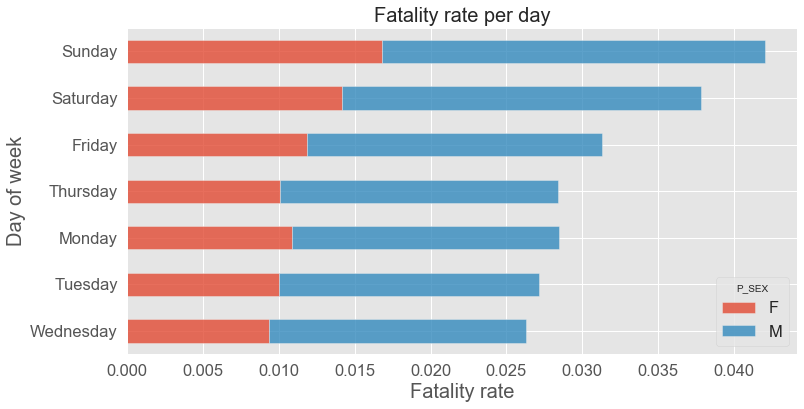

In [18]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
#order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
#.loc[order]
table_day = df.pivot_table('FATAL', index = 'C_WDAY', columns = 'P_SEX', aggfunc = 'mean')
table_day.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.xlabel('Fatality rate',fontsize =20)
plt.ylabel('Day of week',fontsize =20)
plt.legend(title = 'P_SEX')
plt.title('Fatality rate per day',fontsize =20)
plt.savefig('../figures/fig8.pdf')

- Most fatal accidents occur on weekends

##  What is the fatality rate per month?

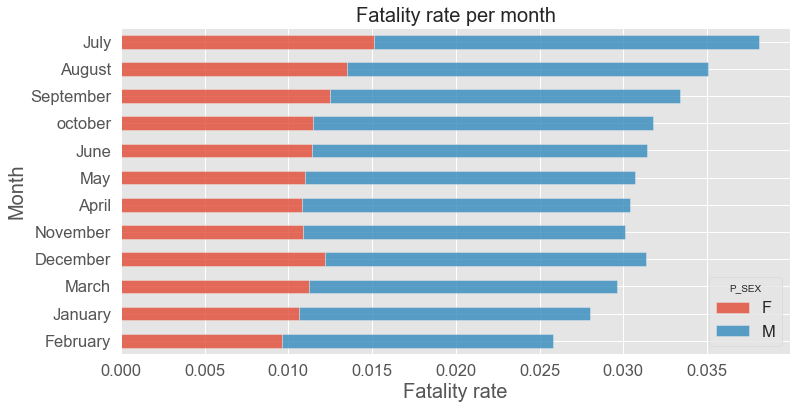

In [19]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# order =['January','February','March', 'April','May', 'June',  
#     'July','August','September', 'october','November','December']
#.loc[order]        
# Plot figure
table_month = df.pivot_table('FATAL', index = 'C_MNTH', columns = 'P_SEX', aggfunc = 'mean')
table_month.sort_values(by =['M']).plot(kind = 'barh', 
                                                   stacked = True, figsize = (12,6), alpha =0.8)
plt.ylabel('Month', fontsize =20)
plt.xlabel('Fatality rate', fontsize =20)
plt.legend(title = 'P_SEX')
plt.title('Fatality rate per month', fontsize =20)
plt.savefig('../figures/fig9.pdf')

- Most fatal accidents occur in July and August, that is during the summer weather

##  What is the fatality rate by weather condition?

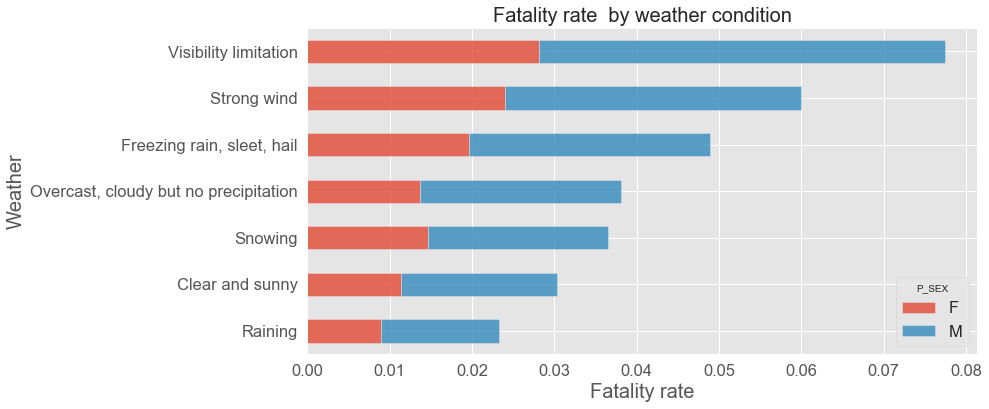

In [20]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
table_weather = df.pivot_table('FATAL', index = 'C_WTHR', columns = 'P_SEX', aggfunc = 'mean')
table_weather.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Weather', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'P_SEX')
plt.title('Fatality rate  by weather condition', fontsize=20)
plt.savefig('../figures/fig10.pdf')

- The fatal collisions occur mostly due to visibility limitation

##  What is the fatality rate by road configuration?

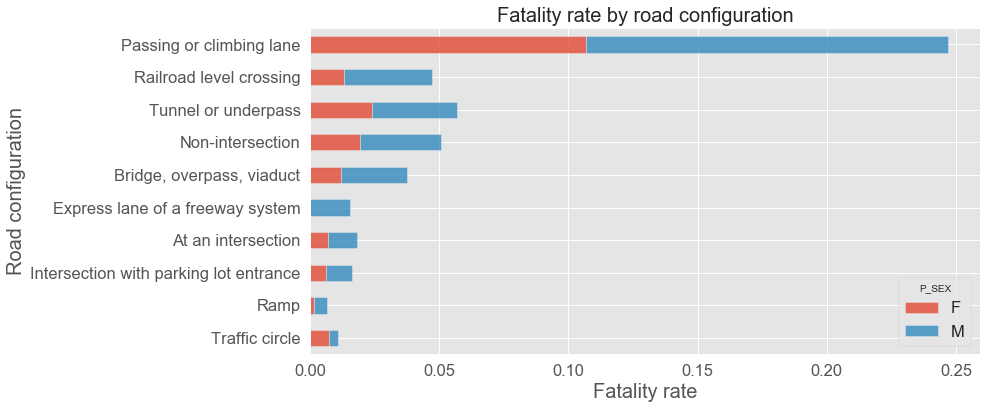

In [21]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
table_road = df.pivot_table('FATAL', index = 'C_RCFG', columns = 'P_SEX', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', 
                                                    stacked = True,figsize = (12,6), alpha =0.8)
plt.ylabel('Road configuration', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'P_SEX')
plt.title('Fatality rate by road configuration', fontsize=20)
plt.savefig('../figures/fig11.pdf')

- Most fatal accidents occur at passing or climbing lane